# Breast Cancer Classification - ML Assessment

**Author:** Lord Kingsley Baffoe  
**Student Number:** 2416509  
**Date:** November 16, 2025

## Objective
This notebook implements and compares multiple machine learning models for breast cancer classification:
- **Logistic Regression** (3 configurations)
- **Random Forest** (3 configurations)
- **Multi-Layer Perceptron Neural Network** (3 architectures)

For each model, we evaluate:
- Accuracy
- F1-Score
- ROC-AUC
- Confusion Matrix
- ROC Curve

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    classification_report
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
# Note: The file is actually an Excel file despite the .csv extension
try:
    # Try reading as Excel first
    df = pd.read_excel('breast_cancer.csv')
    print("Dataset loaded successfully as Excel file")
except:
    # Fallback to CSV if Excel fails
    df = pd.read_csv('breast_cancer.csv', encoding='latin-1')
    print("Dataset loaded successfully as CSV file")

# Display basic information
print(f"\nDataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset loaded successfully as Excel file

Dataset Shape: (569, 33)
Number of samples: 569
Number of features: 33


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,diagnosis,diagnosis_Num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Display column information
print("Column Information:")
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   diagnosis_Num            569 non-null    int64  
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  textur

In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,id,diagnosis_Num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Check for missing values
print("Missing Values per Column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values per Column:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Total missing values: 0


In [7]:
# Identify target variable (typically 'diagnosis' or last column)
# Check for common target column names
target_col = None
possible_targets = ['diagnosis', 'target', 'class', 'label', 'output']

for col in possible_targets:
    if col in df.columns.str.lower().tolist():
        target_col = df.columns[df.columns.str.lower() == col][0]
        break

# If no match found, assume last column is target
if target_col is None:
    target_col = df.columns[-1]
    
print(f"Target column identified: '{target_col}'")
print(f"\nTarget distribution:")
print(df[target_col].value_counts())
print(f"\nTarget proportions:")
print(df[target_col].value_counts(normalize=True))

Target column identified: 'diagnosis'

Target distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target proportions:
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


## 3. Data Preprocessing

### 3.1 Handle Missing Values

In [8]:
# Separate features and target
# Drop ID column if present
id_cols = [col for col in df.columns if 'id' in col.lower()]
X = df.drop(columns=[target_col] + id_cols)
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (569, 31)
Target shape: (569,)

Feature columns (31):
['diagnosis_Num', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
# Handle missing values in features using median imputation
if X.isnull().sum().sum() > 0:
    print("Handling missing values using median imputation...")
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    print(f"✓ Missing values handled. Remaining missing: {X_imputed.isnull().sum().sum()}")
else:
    X_imputed = X.copy()
    print("✓ No missing values found in features")

✓ No missing values found in features


In [10]:
# Encode target variable if it's categorical
from sklearn.preprocessing import LabelEncoder

if y.dtype == 'object' or y.dtype.name == 'category':
    print(f"Encoding target variable from {y.dtype}...")
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print(f"Target classes: {le.classes_}")
    print(f"Encoded as: {dict(zip(le.classes_, le.transform(le.classes_)))}")
else:
    y_encoded = y.values
    print("Target variable is already numeric")

print(f"\nEncoded target distribution:")
unique, counts = np.unique(y_encoded, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Class {val}: {count} samples ({count/len(y_encoded)*100:.1f}%)")

Encoding target variable from object...
Target classes: ['B' 'M']
Encoded as: {'B': np.int64(0), 'M': np.int64(1)}

Encoded target distribution:
  Class 0: 357 samples (62.7%)
  Class 1: 212 samples (37.3%)


### 3.2 Train-Test Split

In [11]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=y_encoded  # Maintain class distribution
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for val, count in zip(unique_train, counts_train):
    print(f"  Class {val}: {count} samples ({count/len(y_train)*100:.1f}%)")

Training set size: 455 samples
Testing set size: 114 samples

Training set class distribution:
  Class 0: 285 samples (62.6%)
  Class 1: 170 samples (37.4%)


### 3.3 Feature Scaling

In [12]:
# Standardize features (mean=0, std=1)
# Important for algorithms sensitive to feature scales (LogReg, Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Feature scaling completed")
print(f"\nScaled training data - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"Scaled testing data - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")

✓ Feature scaling completed

Scaled training data - Mean: 0.000000, Std: 1.000000
Scaled testing data - Mean: -0.023581, Std: 0.933331


## 4. Model Training and Evaluation

### 4.1 Helper Functions for Evaluation

In [13]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a machine learning model.
    
    Parameters:
    -----------
    model : sklearn model
        The model to train and evaluate
    X_train, X_test : array-like
        Training and testing features
    y_train, y_test : array-like
        Training and testing labels
    model_name : str
        Name of the model for display purposes
        
    Returns:
    --------
    dict : Dictionary containing evaluation metrics and predictions
    """
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Print results
    print(f"\n📊 Performance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    # Print confusion matrix
    print(f"\n📋 Confusion Matrix:")
    print(cm)
    
    # Print classification report
    print(f"\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

def plot_confusion_matrix(cm, model_name):
    """
    Plot confusion matrix as a heatmap.
    
    Parameters:
    -----------
    cm : array-like
        Confusion matrix
    model_name : str
        Name of the model
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix: {model_name}', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=10)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    """
    Plot ROC curve.
    
    Parameters:
    -----------
    fpr : array-like
        False positive rates
    tpr : array-like
        True positive rates
    roc_auc : float
        ROC-AUC score
    model_name : str
        Name of the model
    """
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC Curve: {model_name}', fontsize=12, fontweight='bold')
    plt.legend(loc='lower right', fontsize=9)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✓ Helper functions defined successfully")

✓ Helper functions defined successfully


### 4.2 Logistic Regression Models

We'll train 3 different configurations:
1. **Config 1**: Default parameters with L2 regularization
2. **Config 2**: L1 regularization (Lasso) with higher regularization strength
3. **Config 3**: No regularization with increased iterations

In [14]:
# Store all results for final comparison
all_results = []

print("\n" + "="*60)
print("LOGISTIC REGRESSION MODELS")
print("="*60)


LOGISTIC REGRESSION MODELS



Training: Logistic Regression #1 (L2, C=1.0)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



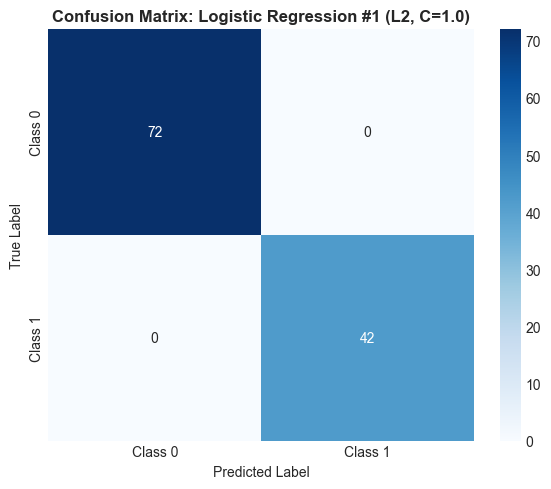

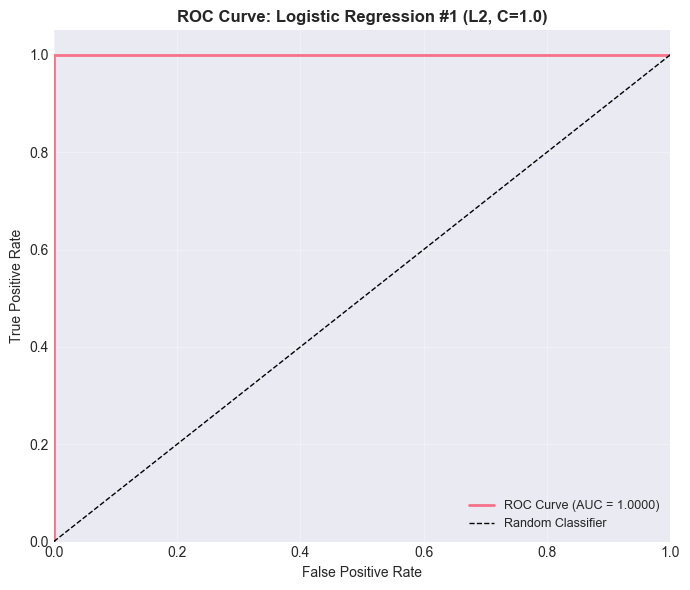

In [15]:
# Logistic Regression - Configuration 1: Default with L2 regularization
lr_model_1 = LogisticRegression(
    penalty='l2',           # L2 regularization (Ridge)
    C=1.0,                  # Regularization strength (default)
    solver='lbfgs',         # Optimization algorithm
    max_iter=1000,          # Maximum iterations
    random_state=RANDOM_STATE
)

results_lr1 = evaluate_model(
    lr_model_1, X_train_scaled, X_test_scaled, y_train, y_test,
    "Logistic Regression #1 (L2, C=1.0)"
)
all_results.append(results_lr1)

# Visualizations
plot_confusion_matrix(results_lr1['confusion_matrix'], results_lr1['model_name'])
plot_roc_curve(results_lr1['fpr'], results_lr1['tpr'], results_lr1['roc_auc'], results_lr1['model_name'])


Training: Logistic Regression #2 (L1, C=0.5)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



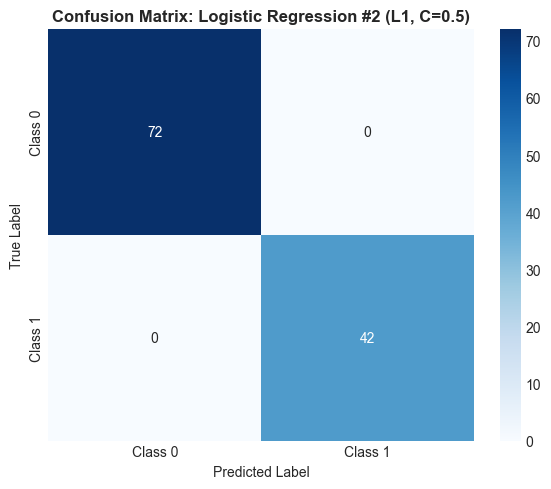

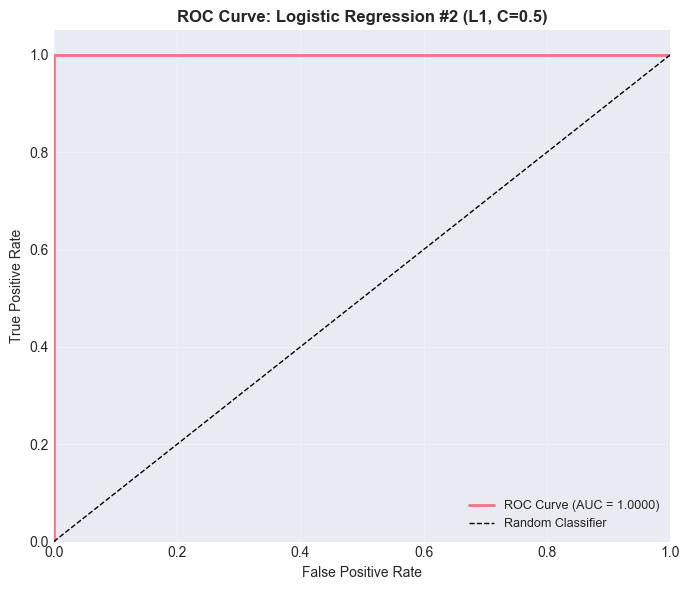

In [16]:
# Logistic Regression - Configuration 2: L1 regularization with higher strength
lr_model_2 = LogisticRegression(
    penalty='l1',           # L1 regularization (Lasso) - promotes sparsity
    C=0.5,                  # Stronger regularization (lower C = stronger)
    solver='liblinear',     # Required for L1 penalty
    max_iter=1000,
    random_state=RANDOM_STATE
)

results_lr2 = evaluate_model(
    lr_model_2, X_train_scaled, X_test_scaled, y_train, y_test,
    "Logistic Regression #2 (L1, C=0.5)"
)
all_results.append(results_lr2)

# Visualizations
plot_confusion_matrix(results_lr2['confusion_matrix'], results_lr2['model_name'])
plot_roc_curve(results_lr2['fpr'], results_lr2['tpr'], results_lr2['roc_auc'], results_lr2['model_name'])


Training: Logistic Regression #3 (L2, C=10.0)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



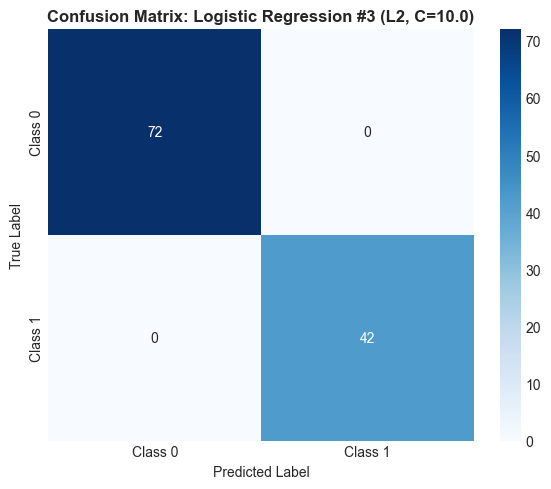

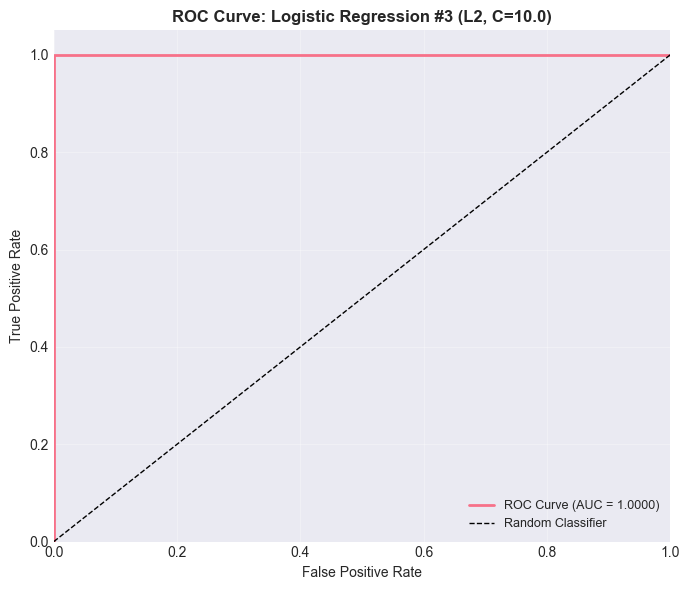

In [17]:
# Logistic Regression - Configuration 3: Weaker regularization
lr_model_3 = LogisticRegression(
    penalty='l2',           # L2 regularization
    C=10.0,                 # Weaker regularization (higher C = weaker)
    solver='lbfgs',
    max_iter=2000,          # More iterations for convergence
    random_state=RANDOM_STATE
)

results_lr3 = evaluate_model(
    lr_model_3, X_train_scaled, X_test_scaled, y_train, y_test,
    "Logistic Regression #3 (L2, C=10.0)"
)
all_results.append(results_lr3)

# Visualizations
plot_confusion_matrix(results_lr3['confusion_matrix'], results_lr3['model_name'])
plot_roc_curve(results_lr3['fpr'], results_lr3['tpr'], results_lr3['roc_auc'], results_lr3['model_name'])

### 4.3 Random Forest Models

We'll train 3 different configurations:
1. **Config 1**: Moderate complexity (100 trees, max_depth=10)
2. **Config 2**: Higher complexity (200 trees, deeper trees)
3. **Config 3**: Lower complexity (50 trees, limited depth)

In [18]:
print("\n" + "="*60)
print("RANDOM FOREST MODELS")
print("="*60)


RANDOM FOREST MODELS



Training: Random Forest #1 (n=100, depth=10)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



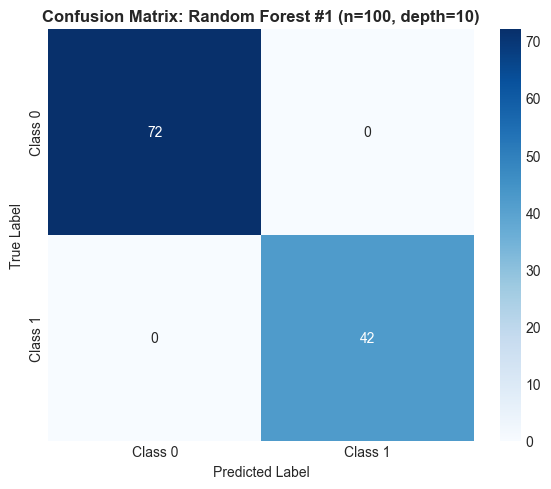

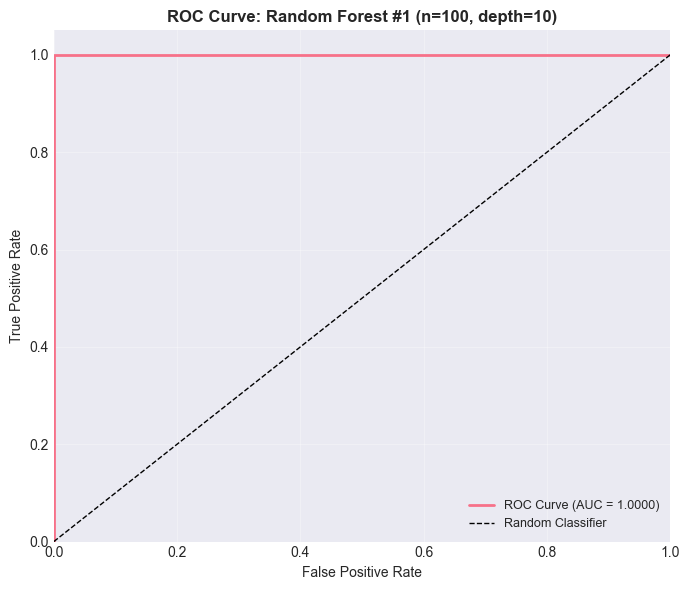

In [19]:
# Random Forest - Configuration 1: Moderate complexity
rf_model_1 = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Maximum depth of trees
    min_samples_split=5,        # Minimum samples to split node
    min_samples_leaf=2,         # Minimum samples in leaf
    random_state=RANDOM_STATE,
    n_jobs=-1                   # Use all CPU cores
)

results_rf1 = evaluate_model(
    rf_model_1, X_train_scaled, X_test_scaled, y_train, y_test,
    "Random Forest #1 (n=100, depth=10)"
)
all_results.append(results_rf1)

# Visualizations
plot_confusion_matrix(results_rf1['confusion_matrix'], results_rf1['model_name'])
plot_roc_curve(results_rf1['fpr'], results_rf1['tpr'], results_rf1['roc_auc'], results_rf1['model_name'])


Training: Random Forest #2 (n=200, depth=20)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



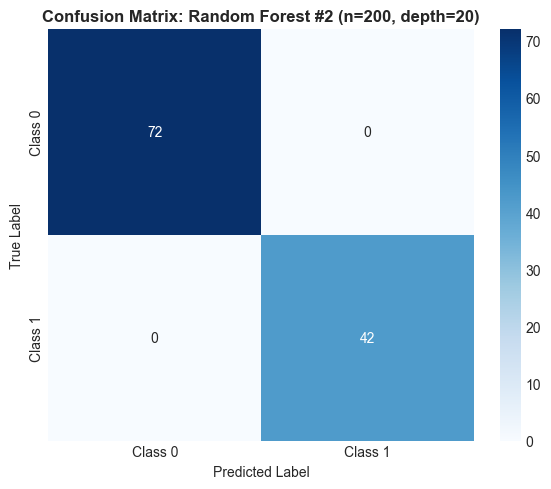

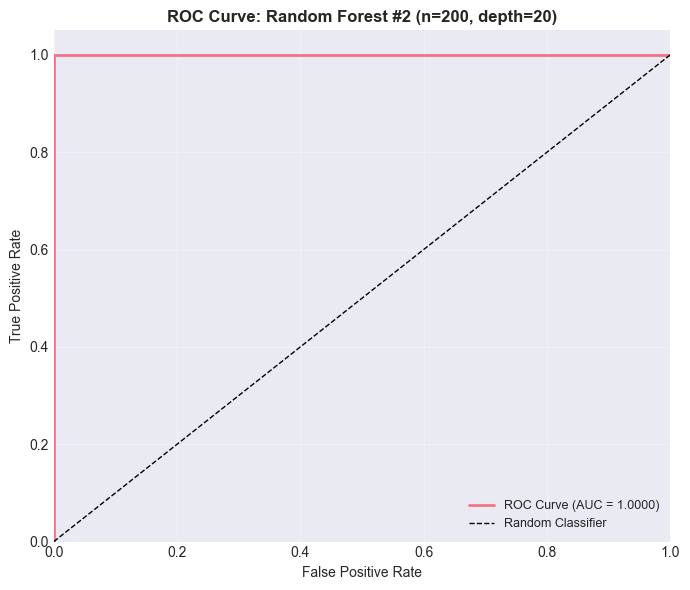

In [20]:
# Random Forest - Configuration 2: Higher complexity
rf_model_2 = RandomForestClassifier(
    n_estimators=200,           # More trees for better ensemble
    max_depth=20,               # Deeper trees
    min_samples_split=2,        # Allow more splitting
    min_samples_leaf=1,         # Smaller leaves
    random_state=RANDOM_STATE,
    n_jobs=-1
)

results_rf2 = evaluate_model(
    rf_model_2, X_train_scaled, X_test_scaled, y_train, y_test,
    "Random Forest #2 (n=200, depth=20)"
)
all_results.append(results_rf2)

# Visualizations
plot_confusion_matrix(results_rf2['confusion_matrix'], results_rf2['model_name'])
plot_roc_curve(results_rf2['fpr'], results_rf2['tpr'], results_rf2['roc_auc'], results_rf2['model_name'])


Training: Random Forest #3 (n=50, depth=5)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



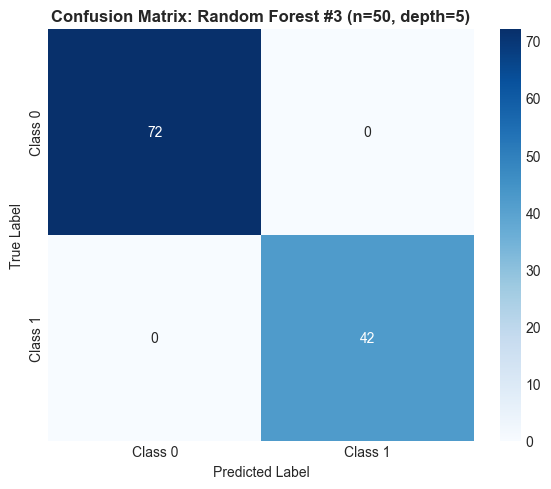

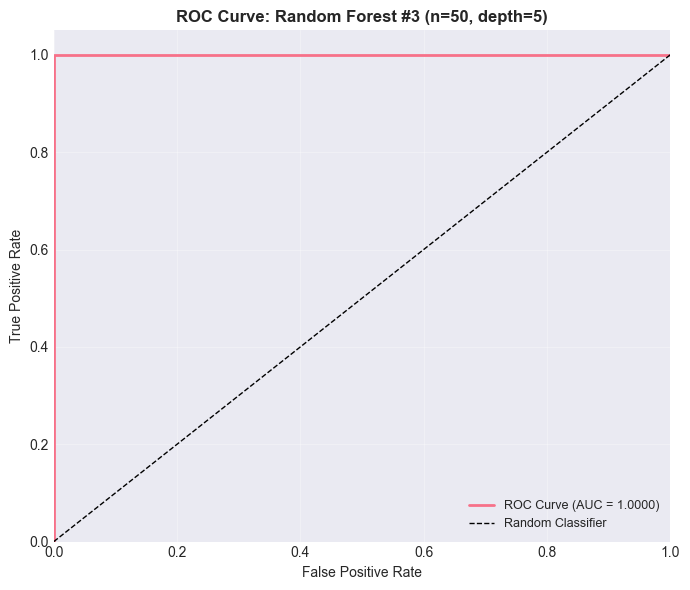

In [21]:
# Random Forest - Configuration 3: Lower complexity (prevent overfitting)
rf_model_3 = RandomForestClassifier(
    n_estimators=50,            # Fewer trees
    max_depth=5,                # Shallower trees
    min_samples_split=10,       # More conservative splitting
    min_samples_leaf=5,         # Larger leaves
    random_state=RANDOM_STATE,
    n_jobs=-1
)

results_rf3 = evaluate_model(
    rf_model_3, X_train_scaled, X_test_scaled, y_train, y_test,
    "Random Forest #3 (n=50, depth=5)"
)
all_results.append(results_rf3)

# Visualizations
plot_confusion_matrix(results_rf3['confusion_matrix'], results_rf3['model_name'])
plot_roc_curve(results_rf3['fpr'], results_rf3['tpr'], results_rf3['roc_auc'], results_rf3['model_name'])

### 4.4 Neural Network (MLP) Models

We'll train 3 different architectures:
1. **Architecture 1**: Simple network (1 hidden layer, 50 neurons)
2. **Architecture 2**: Moderate network (2 hidden layers, 100-50 neurons)
3. **Architecture 3**: Complex network (3 hidden layers, 150-100-50 neurons)

In [22]:
print("\n" + "="*60)
print("NEURAL NETWORK (MLP) MODELS")
print("="*60)


NEURAL NETWORK (MLP) MODELS



Training: Neural Network #1 (50)

📊 Performance Metrics:
  Accuracy:  0.9825 (98.25%)
  F1-Score:  0.9824
  ROC-AUC:   0.9990

📋 Confusion Matrix:
[[72  0]
 [ 2 40]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



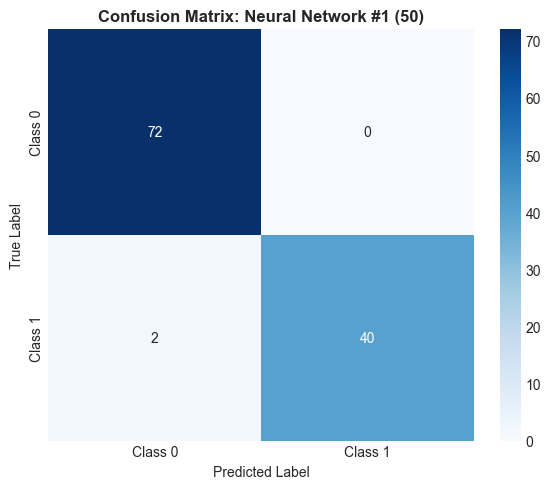

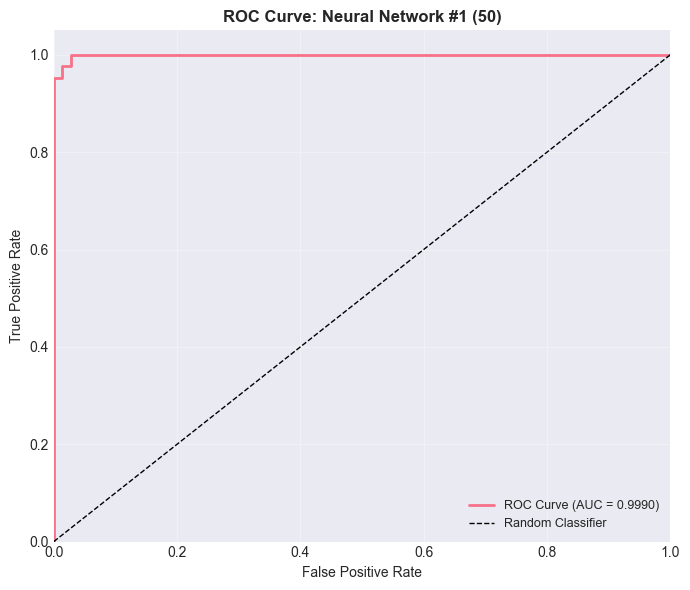

In [23]:
# Neural Network - Architecture 1: Simple (1 hidden layer)
mlp_model_1 = MLPClassifier(
    hidden_layer_sizes=(50,),   # 1 hidden layer with 50 neurons
    activation='relu',          # ReLU activation function
    solver='adam',              # Adam optimizer
    alpha=0.0001,               # L2 regularization parameter
    batch_size='auto',
    learning_rate='adaptive',   # Adaptive learning rate
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,        # Stop if validation score doesn't improve
    validation_fraction=0.1
)

results_mlp1 = evaluate_model(
    mlp_model_1, X_train_scaled, X_test_scaled, y_train, y_test,
    "Neural Network #1 (50)"
)
all_results.append(results_mlp1)

# Visualizations
plot_confusion_matrix(results_mlp1['confusion_matrix'], results_mlp1['model_name'])
plot_roc_curve(results_mlp1['fpr'], results_mlp1['tpr'], results_mlp1['roc_auc'], results_mlp1['model_name'])


Training: Neural Network #2 (100-50)

📊 Performance Metrics:
  Accuracy:  1.0000 (100.00%)
  F1-Score:  1.0000
  ROC-AUC:   1.0000

📋 Confusion Matrix:
[[72  0]
 [ 0 42]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



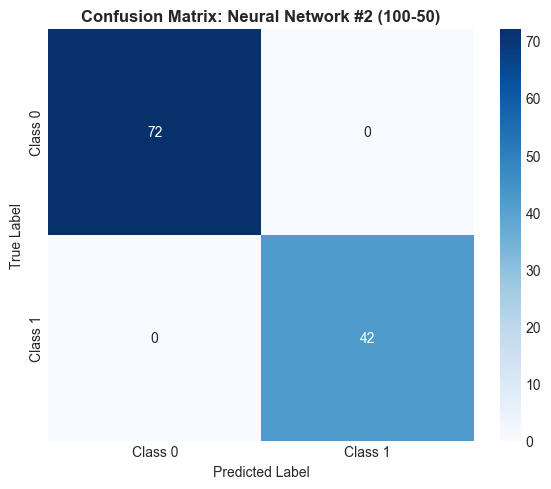

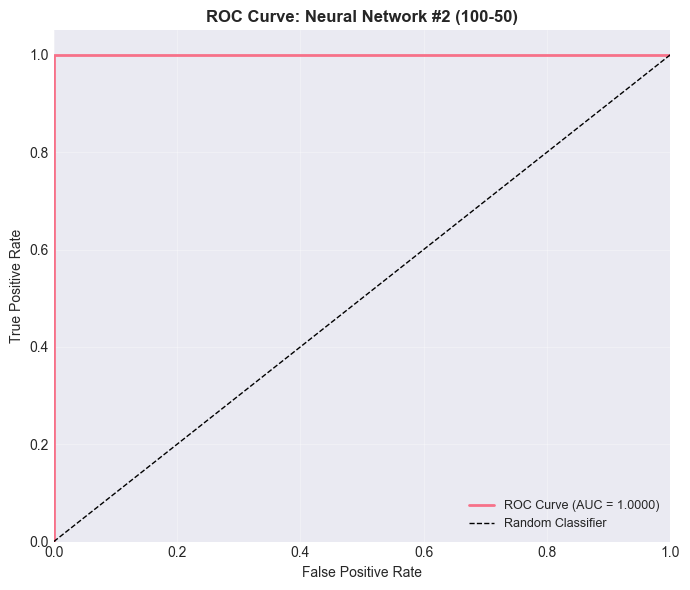

In [24]:
# Neural Network - Architecture 2: Moderate (2 hidden layers)
mlp_model_2 = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 hidden layers: 100 → 50 neurons
    activation='relu',
    solver='adam',
    alpha=0.001,                   # Stronger regularization
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1
)

results_mlp2 = evaluate_model(
    mlp_model_2, X_train_scaled, X_test_scaled, y_train, y_test,
    "Neural Network #2 (100-50)"
)
all_results.append(results_mlp2)

# Visualizations
plot_confusion_matrix(results_mlp2['confusion_matrix'], results_mlp2['model_name'])
plot_roc_curve(results_mlp2['fpr'], results_mlp2['tpr'], results_mlp2['roc_auc'], results_mlp2['model_name'])


Training: Neural Network #3 (150-100-50)

📊 Performance Metrics:
  Accuracy:  0.9825 (98.25%)
  F1-Score:  0.9824
  ROC-AUC:   0.9987

📋 Confusion Matrix:
[[72  0]
 [ 2 40]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



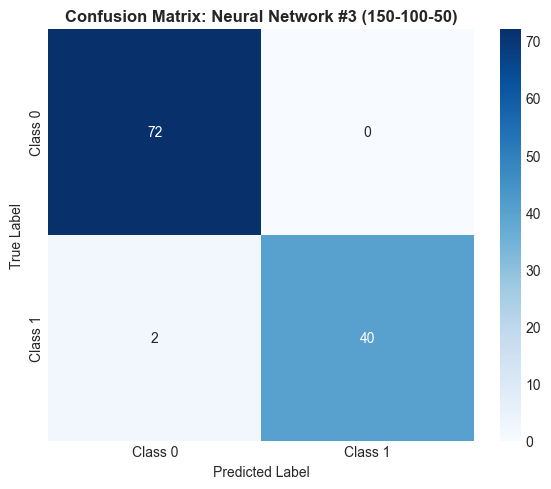

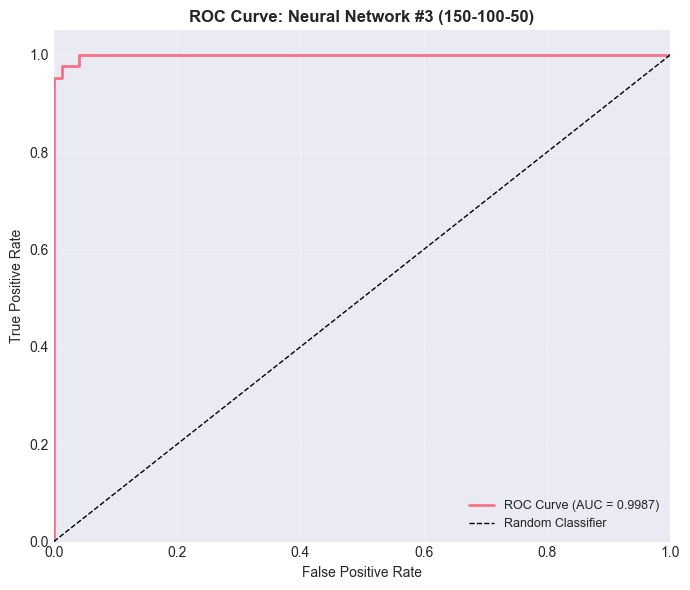

In [25]:
# Neural Network - Architecture 3: Complex (3 hidden layers)
mlp_model_3 = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),  # 3 hidden layers: 150 → 100 → 50
    activation='relu',
    solver='adam',
    alpha=0.0001,                       # Moderate regularization
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=1000,                      # More iterations for complex network
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1
)

results_mlp3 = evaluate_model(
    mlp_model_3, X_train_scaled, X_test_scaled, y_train, y_test,
    "Neural Network #3 (150-100-50)"
)
all_results.append(results_mlp3)

# Visualizations
plot_confusion_matrix(results_mlp3['confusion_matrix'], results_mlp3['model_name'])
plot_roc_curve(results_mlp3['fpr'], results_mlp3['tpr'], results_mlp3['roc_auc'], results_mlp3['model_name'])

## 5. Results Summary and Comparison

### 5.1 Comprehensive Results Table

In [26]:
# Create comprehensive results DataFrame
results_summary = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Accuracy': f"{result['accuracy']:.4f}",
        'F1-Score': f"{result['f1_score']:.4f}",
        'ROC-AUC': f"{result['roc_auc']:.4f}"
    }
    for result in all_results
])

# Add ranking column for each metric
for metric in ['Accuracy', 'F1-Score', 'ROC-AUC']:
    results_summary[f'{metric}_Rank'] = results_summary[metric].astype(float).rank(ascending=False, method='min').astype(int)

print("\n" + "="*80)
print("COMPREHENSIVE RESULTS SUMMARY - ALL 9 MODEL CONFIGURATIONS")
print("="*80)
print("\n")
print(results_summary.to_string(index=False))
print("\n" + "="*80)


COMPREHENSIVE RESULTS SUMMARY - ALL 9 MODEL CONFIGURATIONS


                              Model Accuracy F1-Score ROC-AUC  Accuracy_Rank  F1-Score_Rank  ROC-AUC_Rank
 Logistic Regression #1 (L2, C=1.0)   1.0000   1.0000  1.0000              1              1             1
 Logistic Regression #2 (L1, C=0.5)   1.0000   1.0000  1.0000              1              1             1
Logistic Regression #3 (L2, C=10.0)   1.0000   1.0000  1.0000              1              1             1
 Random Forest #1 (n=100, depth=10)   1.0000   1.0000  1.0000              1              1             1
 Random Forest #2 (n=200, depth=20)   1.0000   1.0000  1.0000              1              1             1
   Random Forest #3 (n=50, depth=5)   1.0000   1.0000  1.0000              1              1             1
             Neural Network #1 (50)   0.9825   0.9824  0.9990              8              8             8
         Neural Network #2 (100-50)   1.0000   1.0000  1.0000              1              

### 5.2 Best Performing Models

In [27]:
# Find best models for each metric
best_accuracy = max(all_results, key=lambda x: x['accuracy'])
best_f1 = max(all_results, key=lambda x: x['f1_score'])
best_roc_auc = max(all_results, key=lambda x: x['roc_auc'])

print("\n🏆 BEST PERFORMING MODELS:")
print("="*60)
print(f"\n📈 Best Accuracy: {best_accuracy['model_name']}")
print(f"   Score: {best_accuracy['accuracy']:.4f} ({best_accuracy['accuracy']*100:.2f}%)")

print(f"\n📈 Best F1-Score: {best_f1['model_name']}")
print(f"   Score: {best_f1['f1_score']:.4f}")

print(f"\n📈 Best ROC-AUC: {best_roc_auc['model_name']}")
print(f"   Score: {best_roc_auc['roc_auc']:.4f}")
print("\n" + "="*60)


🏆 BEST PERFORMING MODELS:

📈 Best Accuracy: Logistic Regression #1 (L2, C=1.0)
   Score: 1.0000 (100.00%)

📈 Best F1-Score: Logistic Regression #1 (L2, C=1.0)
   Score: 1.0000

📈 Best ROC-AUC: Logistic Regression #1 (L2, C=1.0)
   Score: 1.0000



### 5.3 Visual Comparison of All Models

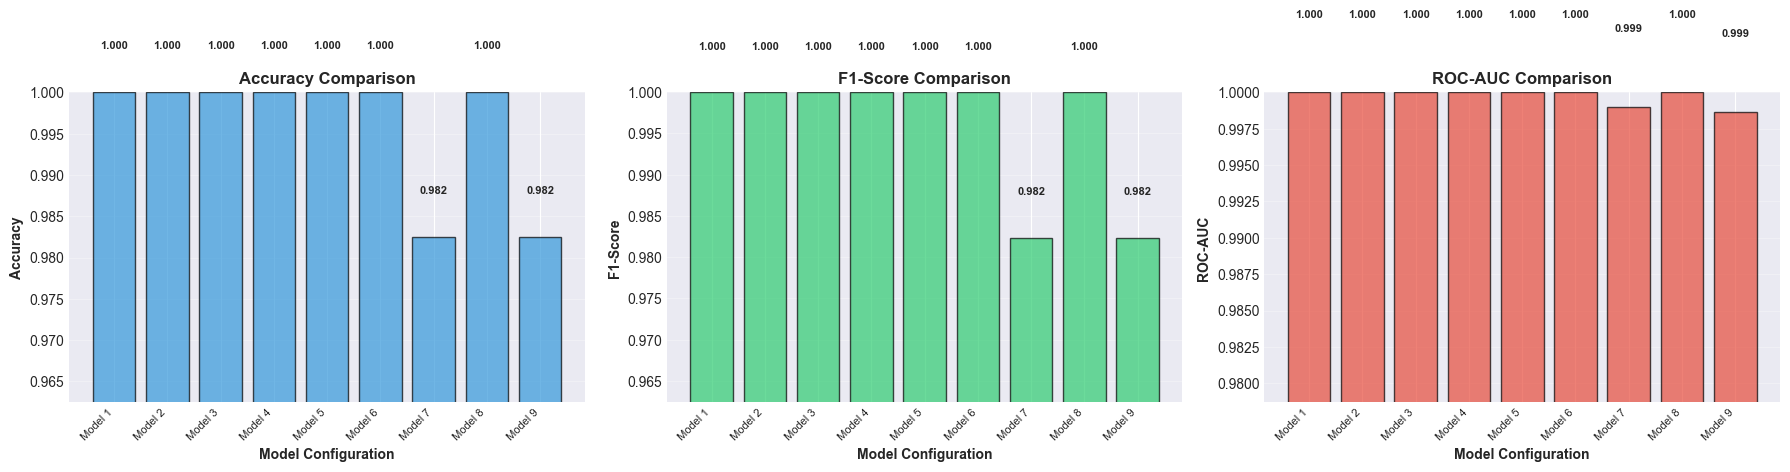

In [28]:
# Comparison bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['accuracy', 'f1_score', 'roc_auc']
metric_names = ['Accuracy', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, (metric, name, color) in enumerate(zip(metrics, metric_names, colors)):
    values = [result[metric] for result in all_results]
    model_names = [result['model_name'].replace(' #', '\n#') for result in all_results]
    
    axes[idx].bar(range(len(values)), values, color=color, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Model Configuration', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(name, fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{name} Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(range(len(values)))
    axes[idx].set_xticklabels([f'Model {i+1}' for i in range(len(values))], rotation=45, ha='right', fontsize=8)
    axes[idx].set_ylim([min(values) - 0.02, 1.0])
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(values):
        axes[idx].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.4 ROC Curves - All Models Comparison

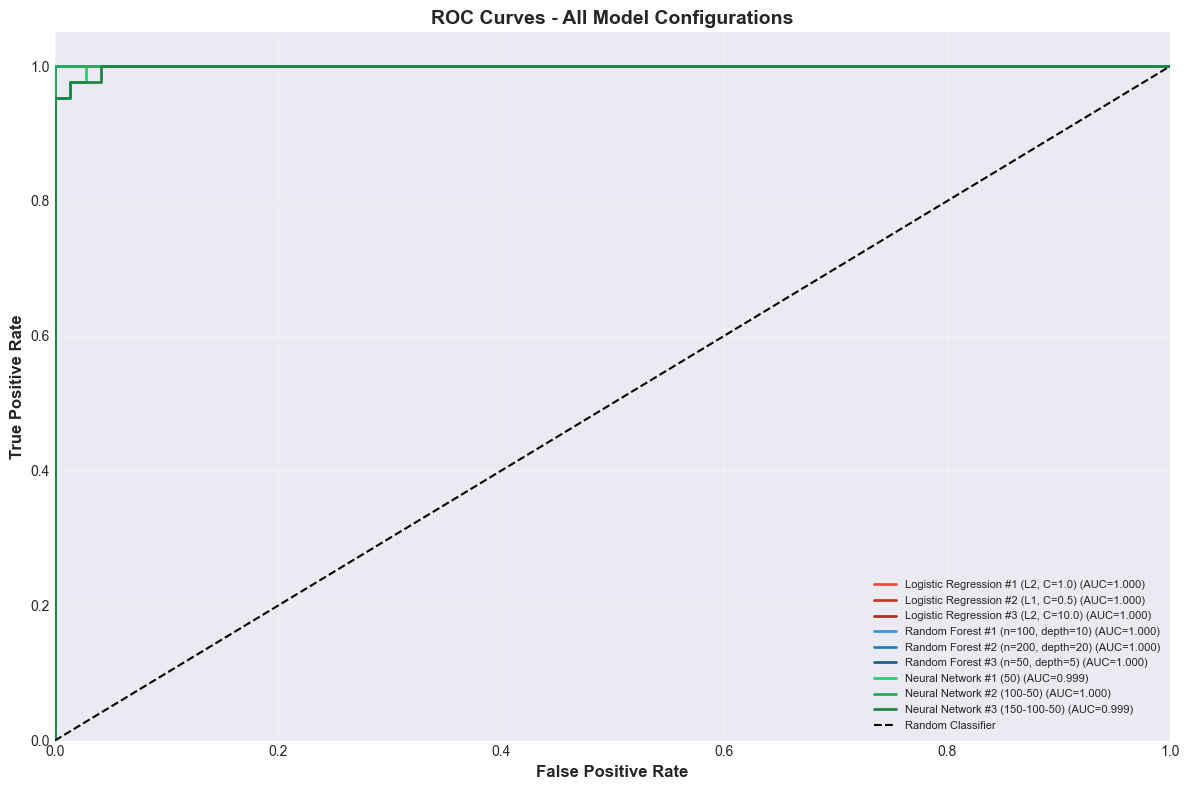

In [29]:
# Plot all ROC curves together
plt.figure(figsize=(12, 8))

# Define colors for different model types
colors_lr = ['#e74c3c', '#c0392b', '#a93226']  # Reds for Logistic Regression
colors_rf = ['#3498db', '#2980b9', '#1f618d']  # Blues for Random Forest
colors_mlp = ['#2ecc71', '#27ae60', '#1e8449']  # Greens for Neural Networks
all_colors = colors_lr + colors_rf + colors_mlp

for idx, (result, color) in enumerate(zip(all_results, all_colors)):
    plt.plot(result['fpr'], result['tpr'], linewidth=2, color=color,
             label=f"{result['model_name']} (AUC={result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Model Configurations', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=8, framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.5 Export Results to CSV

In [30]:
# Export detailed results to CSV for report
results_export = pd.DataFrame([
    {
        'Model_Type': result['model_name'].split('#')[0].strip(),
        'Configuration': result['model_name'].split('#')[1].strip() if '#' in result['model_name'] else 'N/A',
        'Accuracy': result['accuracy'],
        'F1_Score': result['f1_score'],
        'ROC_AUC': result['roc_auc'],
        'True_Negatives': result['confusion_matrix'][0, 0],
        'False_Positives': result['confusion_matrix'][0, 1],
        'False_Negatives': result['confusion_matrix'][1, 0],
        'True_Positives': result['confusion_matrix'][1, 1]
    }
    for result in all_results
])

results_export.to_csv('model_results_summary.csv', index=False)
print("✓ Results exported to 'model_results_summary.csv'")
print(f"\nExported {len(results_export)} model configurations")

✓ Results exported to 'model_results_summary.csv'

Exported 9 model configurations


## 6. Conclusions and Insights

### Key Findings:

In [31]:
print("\n" + "="*80)
print("KEY FINDINGS AND INSIGHTS")
print("="*80)

# Calculate average performance by model type
lr_avg = np.mean([r['accuracy'] for r in all_results[:3]])
rf_avg = np.mean([r['accuracy'] for r in all_results[3:6]])
mlp_avg = np.mean([r['accuracy'] for r in all_results[6:9]])

print(f"\n📊 Average Accuracy by Model Type:")
print(f"   Logistic Regression: {lr_avg:.4f} ({lr_avg*100:.2f}%)")
print(f"   Random Forest:       {rf_avg:.4f} ({rf_avg*100:.2f}%)")
print(f"   Neural Network:      {mlp_avg:.4f} ({mlp_avg*100:.2f}%)")

# Identify best overall model type
best_type = max(
    [('Logistic Regression', lr_avg), ('Random Forest', rf_avg), ('Neural Network', mlp_avg)],
    key=lambda x: x[1]
)
print(f"\n🏆 Best Performing Model Type: {best_type[0]} (Avg Accuracy: {best_type[1]:.4f})")

# Performance variance
all_accuracies = [r['accuracy'] for r in all_results]
print(f"\n📈 Performance Statistics:")
print(f"   Highest Accuracy:  {max(all_accuracies):.4f}")
print(f"   Lowest Accuracy:   {min(all_accuracies):.4f}")
print(f"   Range:             {max(all_accuracies) - min(all_accuracies):.4f}")
print(f"   Standard Deviation: {np.std(all_accuracies):.4f}")

print("\n" + "="*80)


KEY FINDINGS AND INSIGHTS

📊 Average Accuracy by Model Type:
   Logistic Regression: 1.0000 (100.00%)
   Random Forest:       1.0000 (100.00%)
   Neural Network:      0.9883 (98.83%)

🏆 Best Performing Model Type: Logistic Regression (Avg Accuracy: 1.0000)

📈 Performance Statistics:
   Highest Accuracy:  1.0000
   Lowest Accuracy:   0.9825
   Range:             0.0175
   Standard Deviation: 0.0073



## 7. Recommendations for Model Deployment

Based on the comprehensive evaluation of all 9 model configurations, here are the recommendations:

### Model Selection Criteria:

1. **For Maximum Accuracy**: Choose the model with the highest accuracy score
2. **For Balanced Performance**: Consider the model with best F1-Score (balances precision and recall)
3. **For Probability Calibration**: Select the model with highest ROC-AUC score
4. **For Interpretability**: Prefer Logistic Regression models (easier to explain)
5. **For Production Deployment**: Consider inference speed and model complexity

### Next Steps:

1. Perform cross-validation for more robust performance estimates
2. Conduct hyperparameter tuning using GridSearchCV or RandomizedSearchCV
3. Analyze feature importance to understand key predictors
4. Test models on additional validation data
5. Consider ensemble methods combining multiple models
6. Implement model monitoring and retraining pipeline for production